In [106]:
import numpy as np
import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity

from gem.embedding.sdne import SDNE
from gem.evaluation import evaluate_graph_reconstruction as gr
from gem.utils import graph_util

# Instatiate the embedding method with hyperparameters
sdne = SDNE(d=2, beta=5, alpha=1e-5, nu1=1e-6, nu2=1e-6, K=3, n_units=[50, 15,],
            rho=0.3, n_iter=5, xeta=0.01, n_batch=500 )

# Load graph
# G = graph_util.loadGraph('gem/data/karate.edgelist')
G = nx.karate_club_graph()
# G = nx.read_gml("embedded_football.gml")
# G = nx.read_edgelist("Uetz_screen.txt")
G = max(nx.connected_component_subgraphs(G), key=len).to_directed()
G = nx.convert_node_labels_to_integers(G)

# second level similarity
S1 = np.array(nx.adj_matrix(G).todense())
S2 = cosine_similarity(S1)

# similarity matrix (for weights)
S = S1 + 5 * S2
S /= np.max(S)

nodes = np.array(G.nodes())
weights = {(u, v): S[np.where(nodes==u)[0], np.where(nodes==v)[0]][0] for u, v in G.edges()}

# set weights 
nx.set_edge_attributes(G, "weight", weights)

In [107]:
# Learn embedding - accepts a networkx graph or file with edge list
Y, t = sdne.learn_embedding(G, edge_f=None, is_weighted=True, no_python=True)

/home/david/miniconda2/lib/python2.7/site-packages/gem/embedding/sdne_utils.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Elemwise{m..., inputs=/input_76)`
  encoder = Model(input=x, output=y[K])
/home/david/miniconda2/lib/python2.7/site-packages/gem/embedding/sdne_utils.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Elemwise{m..., inputs=/input_77)`
  decoder = Model(input=y, output=x_hat)
/home/david/miniconda2/lib/python2.7/site-packages/gem/embedding/sdne_utils.py:45: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[Elemwise{..., inputs=/input_78)`
  autoencoder = Model(input=x, output=[x_hat, y])


EPOCH 0/5
Epoch 1/1
156/156 [==============================] - 0s - loss: 11.7722 - merge_76_loss: 5.8840 - merge_77_loss: 5.8840 - merge_78_loss: 0.0033
EPOCH 1/5
Epoch 1/1
156/156 [==============================] - 0s - loss: 10.1496 - merge_76_loss: 5.0727 - merge_77_loss: 5.0727 - merge_78_loss: 0.0052
EPOCH 2/5
Epoch 1/1
156/156 [==============================] - 0s - loss: 8.3670 - merge_76_loss: 4.1814 - merge_77_loss: 4.1814 - merge_78_loss: 0.0050
EPOCH 3/5
Epoch 1/1
156/156 [==============================] - 0s - loss: 7.4101 - merge_76_loss: 3.7030 - merge_77_loss: 3.7030 - merge_78_loss: 0.0049
EPOCH 4/5
Epoch 1/1
156/156 [==============================] - 0s - loss: 7.3762 - merge_76_loss: 3.6860 - merge_77_loss: 3.6860 - merge_78_loss: 0.0052


In [41]:
?SDNE

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

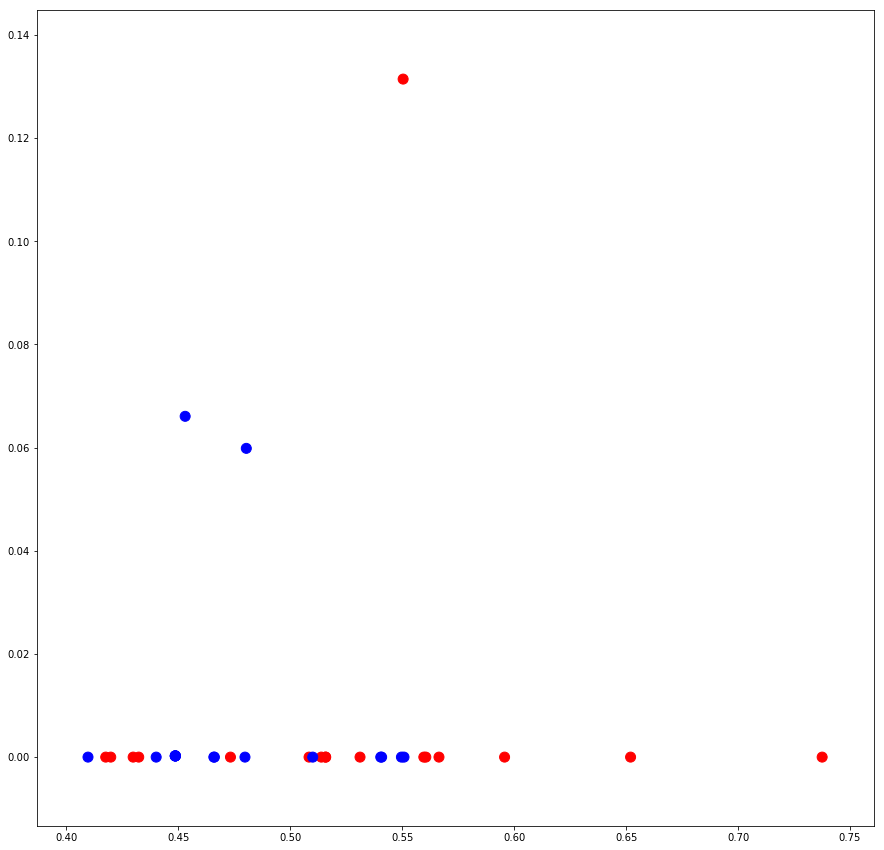

In [109]:
plt.figure(figsize=(15, 15))
plt.scatter(Y[:, 0], Y[:, 1], c=["r" if v=="Mr. Hi" else "b" for v in nx.get_node_attributes(G,  "club").values()], s=100)

In [105]:
Y

array([[  1.06329657e-02,   0.00000000e+00],
       [  1.39300272e-01,   9.29646641e-02],
       [  9.76119563e-02,   1.23988003e-01],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  3.04481655e-01,   4.05357599e-01],
       [  0.00000000e+00,   0.00000000e+00],
       [  2.23355606e-01,   3.32649678e-01],
       [  0.00000000e+00,   0.00000000e+00],
       [  3.34998667e-01,   3.50913256e-01],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   7.53532797e-02],
       [  0.00000000e+00,   7.53532797e-02],
       [  5.11325188e-02,   2.05575556e-01],
       [  5.56729268e-03,   1.23489156e-01],
       [  0.00000000e+00,   7.53532797e-02],
       [  0.00000000e+00,   1.18511856e-01],
       [  0.00000000e+00,   7.53532797e-02],
       [  5.56729268e-03,   1.23489156e-01],
       [  

In [84]:
from sklearn.manifold import MDS

In [85]:
mds = MDS(n_components=2, dissimilarity="precomputed", metric=True)

In [88]:
St = mds.fit_transform(1 - S)

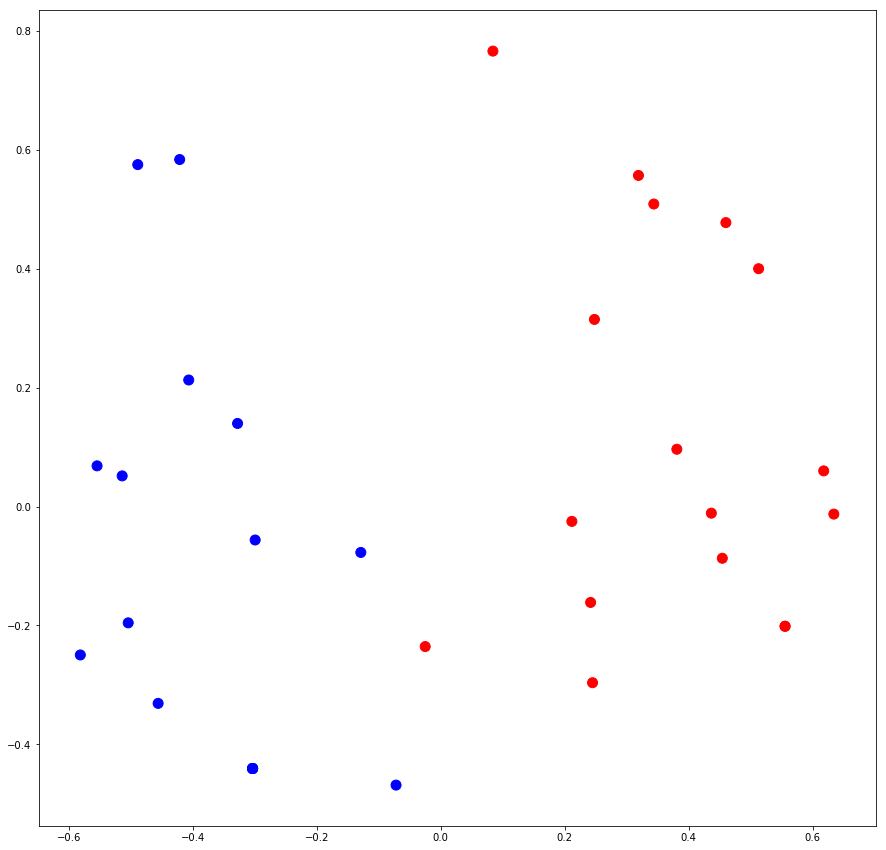

In [92]:
plt.figure(figsize=(15, 15))
plt.scatter(St[:, 0], St[:, 1], 
            c=["r" if v=="Mr. Hi" else "b" for v in nx.get_node_attributes(G,  "club").values()], s=100)